In [43]:
import xgboost as xgb
from xgboost import XGBClassifier
import first
import pandas as pd
import data_io as di
from sklearn import cross_validation, metrics
from sklearn.datasets import load_svmlight_file
from sklearn.grid_search import GridSearchCV 
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


In [63]:
def modelfit(alg, X, y,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X, y)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

#Fit the algorithm on the data
    alg.fit(X, y,eval_metric='error')

#Predict training set:
    dtrain_predictions = alg.predict(X)
    dtrain_predprob = alg.predict_proba(X)[:,1]

#Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(y, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob))

    feat_imp = pd.Series(alg.feature_importances_).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [64]:
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=200,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 scale_pos_weight=1,
 random_state=27)


Model Report
Accuracy : 0.9344
AUC Score (Train): 0.934377


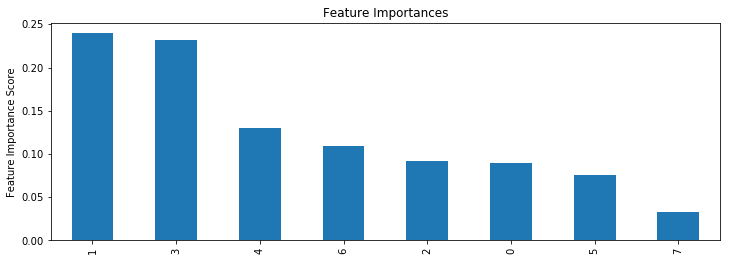

In [65]:
modelfit(xgb1, X, y)

In [52]:
param_test1 = {
    'max_depth': list(range(3,10,2)),
    'min_child_weight':list(range(1,6,2))
}
gsearch1 = GridSearchCV(estimator=XGBClassifier(learning_rate =0.1, n_estimators=200, max_depth=5,
min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,y)
gsearch1.grid_scores_ ,gsearch1.best_params_, gsearch1.best_score_

([mean: 0.93154, std: 0.00250, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.93152, std: 0.00256, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.93156, std: 0.00251, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.93098, std: 0.00271, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.93113, std: 0.00274, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.93117, std: 0.00270, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.93033, std: 0.00293, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.93047, std: 0.00290, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.93081, std: 0.00283, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.92994, std: 0.00309, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.93018, std: 0.00293, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.93059, std: 0.00284, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 3, 'min_child_weight': 5

In [51]:
param_test1 = {
    'max_depth': list(range(2,5,1)),
    'min_child_weight':list(range(4,7,1))
}
gsearch1 = GridSearchCV(estimator=XGBClassifier(learning_rate =0.1, n_estimators=200, max_depth=5,
min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,y)
gsearch1.grid_scores_ ,gsearch1.best_params_, gsearch1.best_score_

([mean: 0.93122, std: 0.00272, params: {'max_depth': 2, 'min_child_weight': 4},
  mean: 0.93122, std: 0.00267, params: {'max_depth': 2, 'min_child_weight': 5},
  mean: 0.93122, std: 0.00266, params: {'max_depth': 2, 'min_child_weight': 6},
  mean: 0.93152, std: 0.00258, params: {'max_depth': 3, 'min_child_weight': 4},
  mean: 0.93156, std: 0.00251, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.93153, std: 0.00261, params: {'max_depth': 3, 'min_child_weight': 6},
  mean: 0.93155, std: 0.00265, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.93149, std: 0.00260, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.93151, std: 0.00264, params: {'max_depth': 4, 'min_child_weight': 6}],
 {'max_depth': 3, 'min_child_weight': 5},
 0.9315632351457767)

In [70]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=3,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X,y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.93156, std: 0.00251, params: {'gamma': 0.0},
  mean: 0.93155, std: 0.00254, params: {'gamma': 0.1},
  mean: 0.93155, std: 0.00253, params: {'gamma': 0.2},
  mean: 0.93150, std: 0.00258, params: {'gamma': 0.3},
  mean: 0.93153, std: 0.00258, params: {'gamma': 0.4},
  mean: 0.93160, std: 0.00261, params: {'gamma': 0.5},
  mean: 0.93156, std: 0.00260, params: {'gamma': 0.6},
  mean: 0.93150, std: 0.00266, params: {'gamma': 0.7},
  mean: 0.93154, std: 0.00268, params: {'gamma': 0.8},
  mean: 0.93159, std: 0.00265, params: {'gamma': 0.9}],
 {'gamma': 0.5},
 0.9316014768521474)

In [71]:
param_test4 = {
 'subsample':[i/10.0 for i in range(4,10)],
 'colsample_bytree':[i/10.0 for i in range(4,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=3,
 min_child_weight=5, gamma=0.5, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X, y)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.93151, std: 0.00239, params: {'colsample_bytree': 0.4, 'subsample': 0.4},
  mean: 0.93150, std: 0.00249, params: {'colsample_bytree': 0.4, 'subsample': 0.5},
  mean: 0.93133, std: 0.00244, params: {'colsample_bytree': 0.4, 'subsample': 0.6},
  mean: 0.93140, std: 0.00259, params: {'colsample_bytree': 0.4, 'subsample': 0.7},
  mean: 0.93143, std: 0.00255, params: {'colsample_bytree': 0.4, 'subsample': 0.8},
  mean: 0.93141, std: 0.00262, params: {'colsample_bytree': 0.4, 'subsample': 0.9},
  mean: 0.93138, std: 0.00242, params: {'colsample_bytree': 0.5, 'subsample': 0.4},
  mean: 0.93153, std: 0.00242, params: {'colsample_bytree': 0.5, 'subsample': 0.5},
  mean: 0.93148, std: 0.00246, params: {'colsample_bytree': 0.5, 'subsample': 0.6},
  mean: 0.93160, std: 0.00249, params: {'colsample_bytree': 0.5, 'subsample': 0.7},
  mean: 0.93153, std: 0.00259, params: {'colsample_bytree': 0.5, 'subsample': 0.8},
  mean: 0.93160, std: 0.00251, params: {'colsample_bytree': 0.5, 'subsample'

In [72]:
param_test5 = {
 'subsample':[i/100.0 for i in range(60,80,5)],
 'colsample_bytree':[i/100.0 for i in range(80,100,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=3,
 min_child_weight=5, gamma=0.5, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X, y)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.93155, std: 0.00266, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.93139, std: 0.00250, params: {'colsample_bytree': 0.8, 'subsample': 0.65},
  mean: 0.93158, std: 0.00250, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.93169, std: 0.00258, params: {'colsample_bytree': 0.8, 'subsample': 0.75},
  mean: 0.93155, std: 0.00266, params: {'colsample_bytree': 0.85, 'subsample': 0.6},
  mean: 0.93139, std: 0.00250, params: {'colsample_bytree': 0.85, 'subsample': 0.65},
  mean: 0.93158, std: 0.00250, params: {'colsample_bytree': 0.85, 'subsample': 0.7},
  mean: 0.93169, std: 0.00258, params: {'colsample_bytree': 0.85, 'subsample': 0.75},
  mean: 0.93150, std: 0.00253, params: {'colsample_bytree': 0.9, 'subsample': 0.6},
  mean: 0.93129, std: 0.00259, params: {'colsample_bytree': 0.9, 'subsample': 0.65},
  mean: 0.93172, std: 0.00258, params: {'colsample_bytree': 0.9, 'subsample': 0.7},
  mean: 0.93157, std: 0.00260, params: {'colsample_bytree': 0.9, 's

In [74]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=3,
 min_child_weight=5, gamma=0.5, subsample=0.7, colsample_bytree=0.9,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(X, y)
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.93161, std: 0.00268, params: {'reg_alpha': 1e-05},
  mean: 0.93166, std: 0.00263, params: {'reg_alpha': 0.01},
  mean: 0.93161, std: 0.00268, params: {'reg_alpha': 0},
  mean: 0.93164, std: 0.00270, params: {'reg_alpha': 0.1},
  mean: 0.93164, std: 0.00272, params: {'reg_alpha': 1},
  mean: 0.92725, std: 0.00268, params: {'reg_alpha': 100}],
 {'reg_alpha': 0.01},
 0.9316555272063324)